<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101490 entries, 0 to 101489
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          101490 non-null  object 
 1   date        101490 non-null  object 
 2   Item Id     101488 non-null  object 
 3   Item Name   99658 non-null   object 
 4   ad_spend    77303 non-null   float64
 5   anarix_id   101490 non-null  object 
 6   units       83592 non-null   float64
 7   unit_price  101490 non-null  float64
dtypes: float64(3), object(5)
memory usage: 6.2+ MB
None


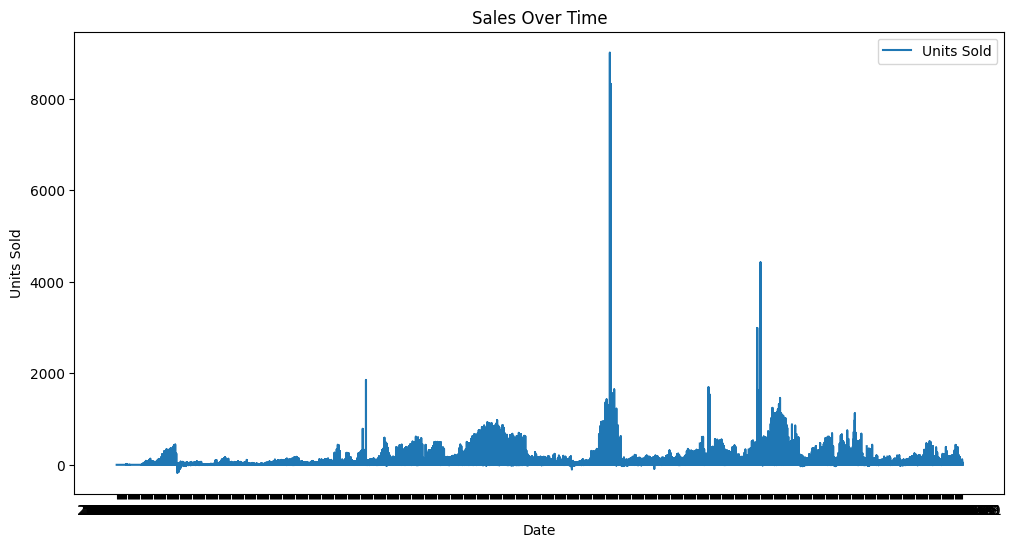

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('train.csv')

# Data overview
print(data.info())

# Plotting sales data
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['units'], label='Units Sold')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('Sales Over Time')
plt.legend()
plt.show()


In [2]:
data.shape

(101490, 8)

In [3]:
data.dtypes


,0
ID,object
date,object
Item Id,object
Item Name,object
ad_spend,float64
anarix_id,object
units,float64
unit_price,float64


In [4]:
data.isnull().sum()

,0
ID,0
date,0
Item Id,2
Item Name,1832
ad_spend,24187
anarix_id,0
units,17898
unit_price,0


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Load data
data = pd.read_csv('train.csv')

# Get the actual column names with missing values
columns_with_missing = data.columns[data.isnull().any()].tolist()

# Separate numerical and categorical columns with missing values
numerical_missing = [col for col in columns_with_missing if data[col].dtype != 'object']
categorical_missing = [col for col in columns_with_missing if data[col].dtype == 'object']

# Handle missing values for numerical columns
imputer_numerical = SimpleImputer(strategy='mean')
for column in numerical_missing:
    data[column] = imputer_numerical.fit_transform(data[[column]])

# Handle missing values for categorical columns
# (Replace 'most_frequent' with a suitable strategy if needed)
imputer_categorical = SimpleImputer(strategy='most_frequent')
for column in categorical_missing:
    # Reshape the imputed data to be 1D
    data[column] = imputer_categorical.fit_transform(data[[column]]).ravel()



In [10]:
!pip install category_encoders

import pandas as pd
import category_encoders as ce

# Sample data
# Pass column names as a list to the 'columns' argument
data = pd.read_csv('train.csv')

# Initialize BinaryEncoder
binary_encoder = ce.BinaryEncoder(cols=['ID', 'date', 'Item Id', 'Item Name', 'anarix_id'])

# Fit and transform the data
data_encoded = binary_encoder.fit_transform(data)

print(data_encoded)

        ID_0  ID_1  ID_2  ID_3  ID_4  ID_5  ID_6  ID_7  ID_8  ID_9  ...  \
0          0     0     0     0     0     0     0     0     0     0  ...   
1          0     0     0     0     0     0     0     0     0     0  ...   
2          0     0     0     0     0     0     0     0     0     0  ...   
3          0     0     0     0     0     0     0     0     0     0  ...   
4          0     0     0     0     0     0     0     0     0     0  ...   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
101485     1     1     0     0     0     1     1     0     0     0  ...   
101486     1     1     0     0     0     1     1     0     0     0  ...   
101487     1     1     0     0     0     1     1     0     0     0  ...   
101488     1     1     0     0     0     1     1     0     0     0  ...   
101489     1     1     0     0     0     1     1     0     0     0  ...   

        Item Name_2  Item Name_3  Item Name_4  Item Name_5  Item Name_6  \
0                 0     

In [12]:
data = pd.concat([data, data_encoded], axis=1).drop(['ID', 'date', 'Item Id', 'Item Name', 'anarix_id'], axis=1)

In [13]:
# Normalize numerical features
data = pd.read_csv('train.csv')
scaler = StandardScaler()
data[['ad_spend', 'units', 'unit_price']] = scaler.fit_transform(data[['ad_spend', 'units', 'unit_price']])

In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('train.csv')

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Columns to encode - use a list
columns_to_encode = ['ID', 'date', 'Item Id', 'Item Name', 'anarix_id']

# Loop through columns and apply label encoding
for col in columns_to_encode:
    data[col] = label_encoder.fit_transform(data[col])

print(data)

            ID  date  Item Id  Item Name  ad_spend  anarix_id  units  \
0            0     0        9        146       NaN          0    0.0   
1            9     0       25         30       NaN          0    0.0   
2            2     0       17        158       NaN          0    0.0   
3            3     0       18        153       NaN          0    0.0   
4            4     0       19        154       NaN          0    0.0   
...        ...   ...      ...        ...       ...        ...    ...   
101485  101483   780      210        199    604.73          0    NaN   
101486  101482   780      209        199    261.21          0    2.0   
101487  101481   780      208        199      0.00          0    NaN   
101488  101480   780      207        199      0.00          0    NaN   
101489  101484   780      211        199      0.00          0    NaN   

        unit_price  
0             0.00  
1             0.00  
2             0.00  
3             0.00  
4             0.00  
...      

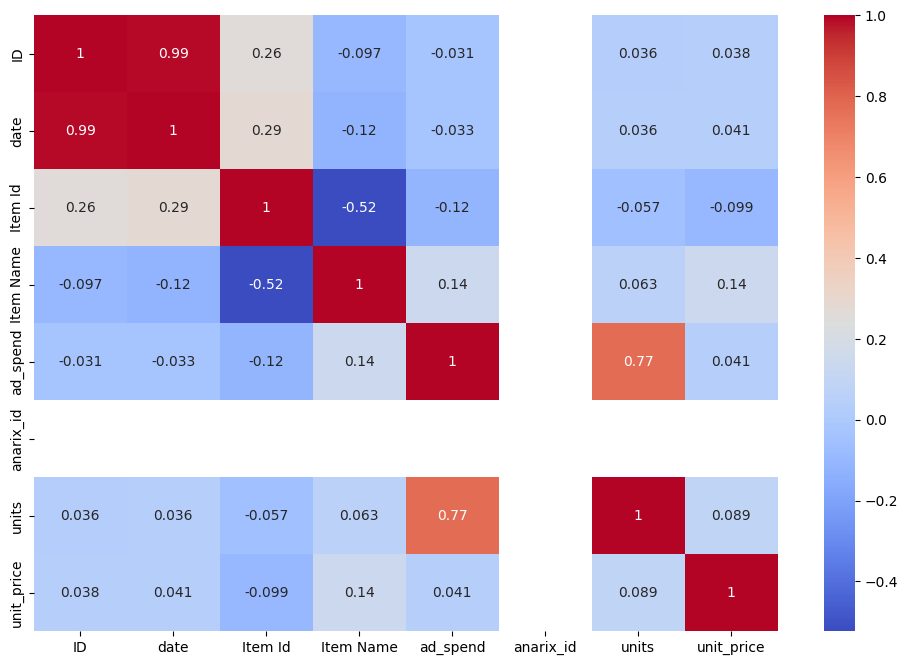

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True, cmap='coolwarm')
plt.show()

In [21]:
import pandas as pd
from scipy import stats

# Sample data
data = pd.read_csv('train.csv')

# Print the column names to check if 'Values' exists
print(data.columns)

# Assuming the column you want to analyze is named 'units' (based on previous code)
# Compute Z-scores for the 'units' column
z_scores = stats.zscore(data['units'])

# Identify outliers in the 'units' column
outliers = data['units'][abs(z_scores) > 3]
print(outliers)

Index(['ID', 'date', 'Item Id', 'Item Name', 'ad_spend', 'anarix_id', 'units',
       'unit_price'],
      dtype='object')
Series([], Name: units, dtype: float64)


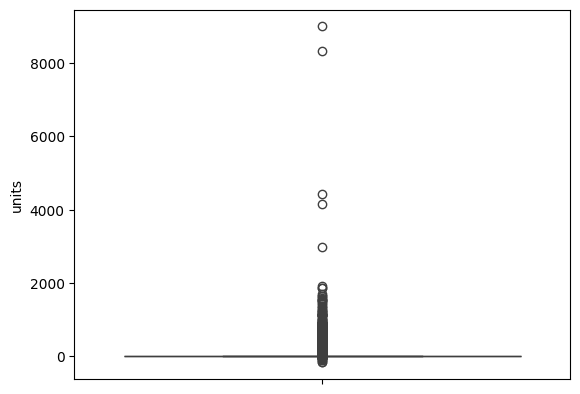

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = pd.read_csv('train.csv')

# Create a box plot
sns.boxplot(data=data['units'])
plt.show()


In [27]:
data = pd.read_csv('train.csv')

# Extracting date features
data['date'] = pd.to_datetime(data['date'])
data['day_of_week'] = data['date'].dt.dayofweek
data['month'] = data['date'].dt.month

# Creating lag features
data['lag_1'] = data['units'].shift(1)
data['rolling_mean_7'] = data['units'].rolling(window=7).mean()

# Dropping NaN values created by lagging
data.dropna(inplace=True)


In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA model fitting
model = SARIMAX(data['units'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Model summary
print(results.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              units   No. Observations:                35746
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood             -212836.949
Date:                            Fri, 02 Aug 2024   AIC                         425683.899
Time:                                    10:36:38   BIC                         425726.318
Sample:                                         0   HQIC                        425697.397
                                          - 35746                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0849      0.001    104.884      0.000       0.083       0.087
ma.L1         -0.9993   8.16e-05  -

In [29]:
from sklearn.model_selection import TimeSeriesSplit
import itertools

# Hyperparameter grid
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

# Grid search
best_aic = float("inf")
best_params = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = SARIMAX(data['units'], order=param, seasonal_order=param_seasonal)
            results = model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_params = (param, param_seasonal)
        except:
            continue

print(f'Best SARIMA params: {best_params}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

Best SARIMA params: ((1, 1, 1), (0, 0, 0, 12))


In [30]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [31]:
# Load datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Convert date columns to datetime
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

# Set date as index
train.set_index('date', inplace=True)
test.set_index('date', inplace=True)


In [34]:
# Example: Adding a lag feature
train['lag_1'] = train['units'].shift(1)

# Check if 'units' column exists in test DataFrame before creating lag
if 'units' in test.columns:
    test['lag_1'] = test['units'].shift(1)
    # Dropping NaN values created by lagging in test DataFrame
    test.dropna(inplace=True)

# Dropping NaN values created by lagging in train DataFrame
train.dropna(inplace=True)

In [35]:
# Define the model with the best parameters found during hyperparameter tuning
best_order = (1, 1, 1)
best_seasonal_order = (1, 1, 1, 12)

# Train the model on the training set
model = SARIMAX(train['units'], order=best_order, seasonal_order=best_seasonal_order)
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              units   No. Observations:                51602
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood             -301871.630
Date:                            Fri, 02 Aug 2024   AIC                         603753.261
Time:                                    11:24:00   BIC                         603797.516
Sample:                                         0   HQIC                        603767.103
                                          - 51602                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1223      0.001    227.976      0.000       0.121       0.123
ma.L1         -0.9997      6e-05  -

In [42]:

start = test.index[0]
end = test.index[-1]

# Make predictions
predictions = model_fit.predict(start=start, end=end, dynamic=False)

# Convert predictions to a DataFrame
predictions = pd.DataFrame(predictions, index=pd.date_range(start=start, end=end), columns=['predicted_units'])  # Explicitly set index

# Merge actual and predicted values for comparison
results = pd.concat([test['units'], predictions], axis=1)
results.columns = ['actual_units', 'predicted_units']

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [41]:
# Forecasting the test set period
# Start from the DAY AFTER the LAST DAY OF the training data to ensure continuity
start = train.index[-1] + pd.DateOffset(days=1)
end = test.index[-1]

# Make predictions
predictions = model_fit.predict(start=start, end=end, dynamic=False)

# Convert predictions to a DataFrame
predictions = pd.DataFrame(predictions, index=pd.date_range(start=start, end=end), columns=['predicted_units'])  # Explicitly set index

# Extract the actual values from the test set as a Series
actual_values = test['units']

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predictions['predicted_units'])
print(f'Mean Squared Error: {mse}')


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [44]:
# Forecasting the test set period
# Ensure the start date is present in the test data's index
start = test.index[0]
end = test.index[-1]

# Make predictions
predictions = model_fit.predict(start=start, end=end, dynamic=False)

# Convert predictions to a DataFrame
predictions = pd.DataFrame(predictions, index=pd.date_range(start=start, end=end), columns=['predicted_units'])  # Explicitly set index

# Merge actual and predicted values for comparison
results = pd.concat([test['units'], predictions], axis=1)
results.columns = ['actual_units', 'predicted_units']

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'